# Import Required Libraries

In [1]:
import numpy as np # for numerical calculation
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # visualising data
import seaborn as sns # advanced visualisation
import warnings
warnings.filterwarnings('ignore') # filter out warnings

# Load The Dataset

In [2]:
df = pd.read_csv('/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv') # loading the dataset

In [3]:
df.head() # checking the dataset

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


# Data Preprocessing

In [4]:
ct = pd.crosstab(df['Target'],df['Failure Type']) # checking since there are two target columns

In [5]:
ct # cross tab

Failure Type,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Target,,,,,,
0,0,9643,0,0,18,0
1,112,9,78,95,0,45


In [6]:
# Replace 0 with 1 in the 'Target' column for all 'Failure Type' values except 'No Failure'
df.loc[(df['Failure Type'] != 'No Failure') & (df['Target'] == 0), 'Target'] = 1

# Check if the values are updated in the crosstab
ct = pd.crosstab(df['Failure Type'], df['Target'])
ct



Target,0,1
Failure Type,,
Heat Dissipation Failure,0,112
No Failure,9643,9
Overstrain Failure,0,78
Power Failure,0,95
Random Failures,0,18
Tool Wear Failure,0,45


In [7]:
# Replace 1 with 0 in the 'Target' column where 'Failure Type' is 'No Failure'
df.loc[(df['Failure Type'] == 'No Failure') & (df['Target'] == 1), 'Target'] = 0

# Verify the updated values in the crosstab
ct = pd.crosstab(df['Failure Type'], df['Target'])
print(ct)


Target                       0    1
Failure Type                       
Heat Dissipation Failure     0  112
No Failure                9652    0
Overstrain Failure           0   78
Power Failure                0   95
Random Failures              0   18
Tool Wear Failure            0   45


In [8]:
df.head() #checking if the edits have been made or not

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [9]:
df.drop(columns = {'UDI','Product ID','Type' ,'Target'},axis=1,inplace=True) # dropping unnecessary columns

In [10]:
df.head() # one final check before moving on

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,298.1,308.6,1551,42.8,0,No Failure
1,298.2,308.7,1408,46.3,3,No Failure
2,298.1,308.5,1498,49.4,5,No Failure
3,298.2,308.6,1433,39.5,7,No Failure
4,298.2,308.7,1408,40.0,9,No Failure


In [11]:
df.describe() # checking distribution of the data in the dataset

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


In [12]:
df.columns # checking the columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Failure Type'],
      dtype='object')

In [13]:
df.rename(columns = {'Air temperature [K]':'AirTemp', 'Process temperature [K]':'ProcessTemp',
       'Rotational speed [rpm]':'RotationSpeed', 'Torque [Nm]':'Torque', 'Tool wear [min]':'ToolWear'},inplace=True)
# renaming the columns for easier interpretation

In [14]:
df.head() # verifying if the changes have been made properly

,AirTemp,ProcessTemp,RotationSpeed,Torque,ToolWear,Failure Type
0,298.1,308.6,1551,42.8,0,No Failure
1,298.2,308.7,1408,46.3,3,No Failure
2,298.1,308.5,1498,49.4,5,No Failure
3,298.2,308.6,1433,39.5,7,No Failure
4,298.2,308.7,1408,40.0,9,No Failure


In [15]:
# RotationSpeed Contains outliers so we will remove them or replace them with nan using IQR technique
Q1 = df['RotationSpeed'].quantile(0.25)
Q3 = df['RotationSpeed'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with NaN
df['RotationSpeed'] = np.where((df['RotationSpeed'] < lower_bound) | (df['RotationSpeed'] > upper_bound), np.nan, df['RotationSpeed'])

In [16]:
df.isnull().sum() # checking if the outliers have been replaced by np.nan

AirTemp            0
ProcessTemp        0
RotationSpeed    418
Torque             0
ToolWear           0
Failure Type       0
dtype: int64

In [17]:
df.describe() # checking the distribution again

,AirTemp,ProcessTemp,RotationSpeed,Torque,ToolWear
count,10000.000000,10000.000000,9582.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1514.204341,39.986910,107.951000
std,2.000259,1.483734,130.495885,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1419.250000,33.200000,53.000000
50%,300.100000,310.100000,1496.000000,40.100000,108.000000
75%,301.500000,311.100000,1595.000000,46.800000,162.000000
max,304.500000,313.800000,1895.000000,76.600000,253.000000


In [18]:
df['RotationSpeed'].fillna(df['RotationSpeed'].median(),inplace=True) # filling NaN with median

In [19]:
df['Failure Type'].unique() # checking the unique values in target variable

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [20]:
df['Failure Type'] = df['Failure Type'].map({'No Failure':0, 'Power Failure':1, 'Tool Wear Failure':2,
       'Overstrain Failure':3, 'Random Failures':4,
       'Heat Dissipation Failure':5}) # mapping the target with specific numerical values

# EDA

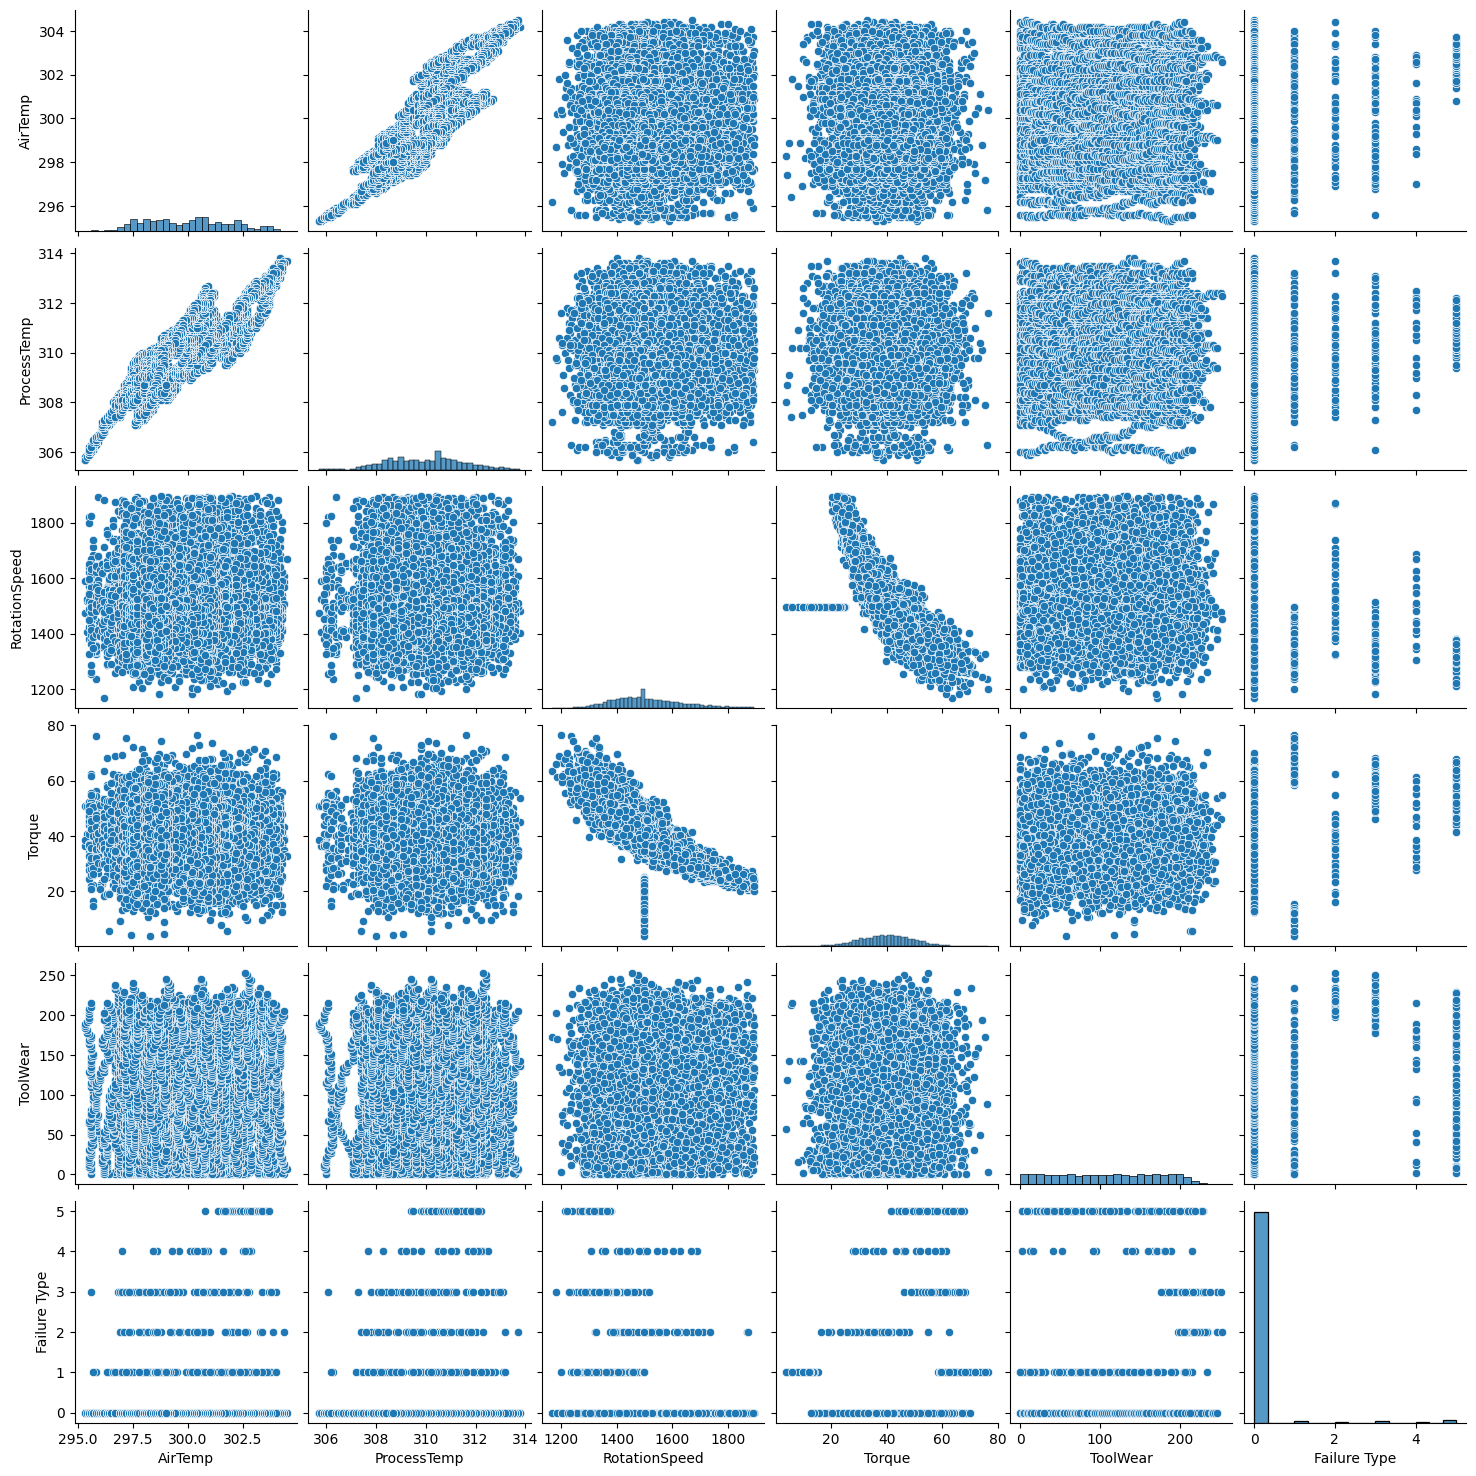

In [21]:
sns.pairplot(df) # distribution of individual features and bivariate analysis

In [22]:
columns = df.drop(columns='Failure Type',axis=1) # dropping target values

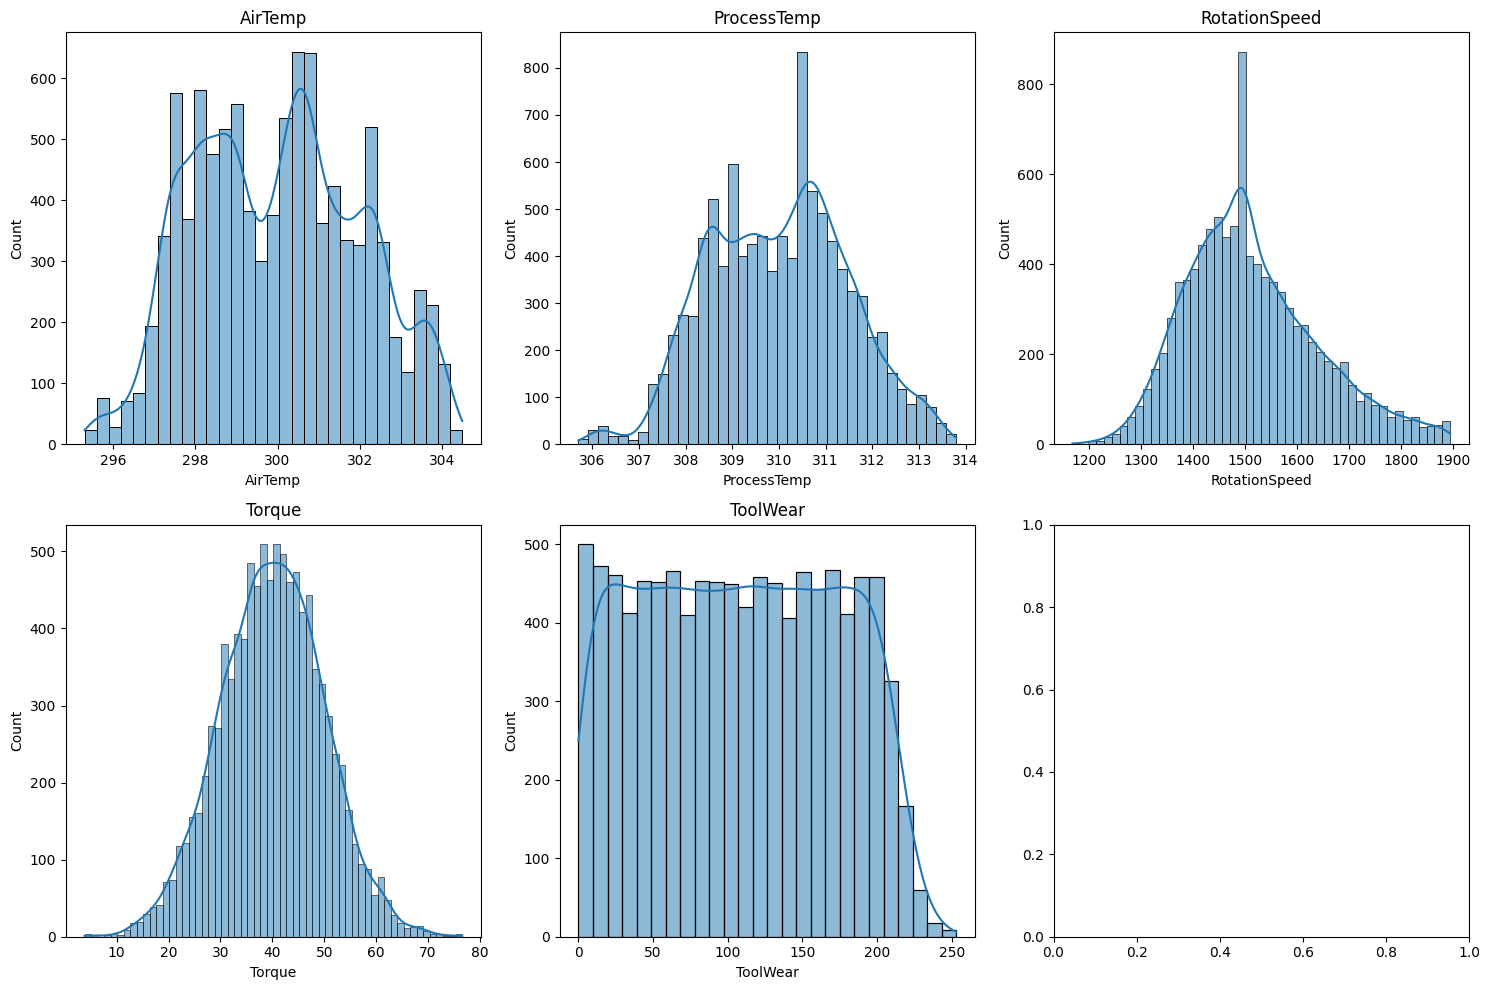

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) # histogram distribution

# List of feature names
features = columns

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the features and plot each histogram
for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'{feature}')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

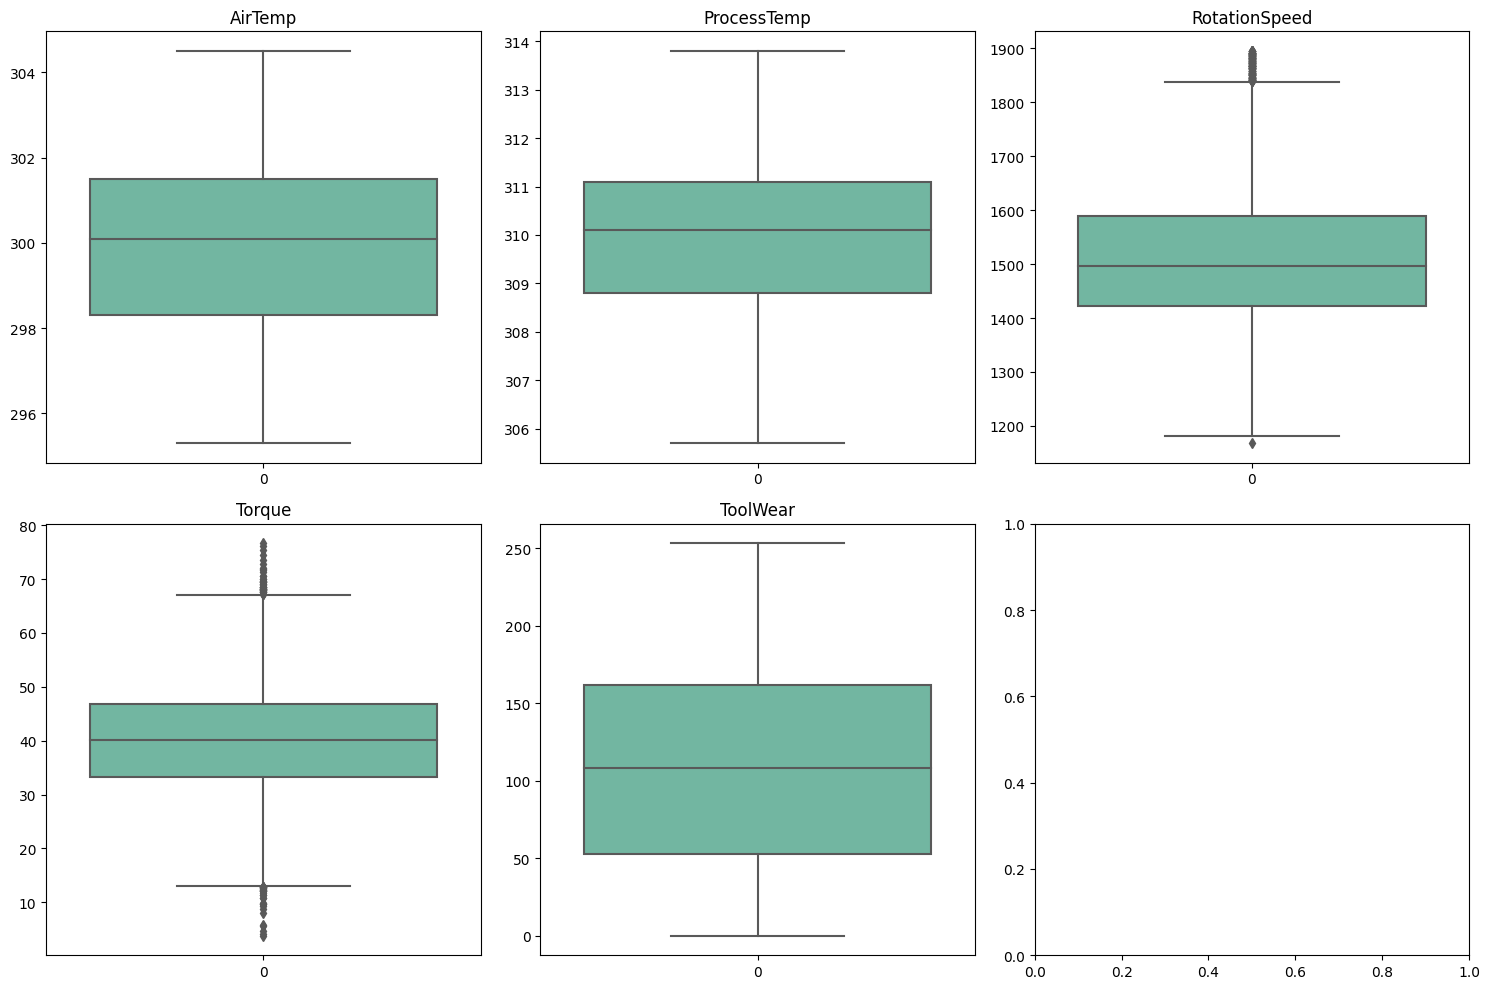

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) # boxplot for outlier detection

# List of feature names
features = columns

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the features and plot each histogram
for i, feature in enumerate(features):
    sns.boxplot(df[feature], ax=axes[i],palette='Set2')
    axes[i].set_title(f'{feature}')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

<Axes: >

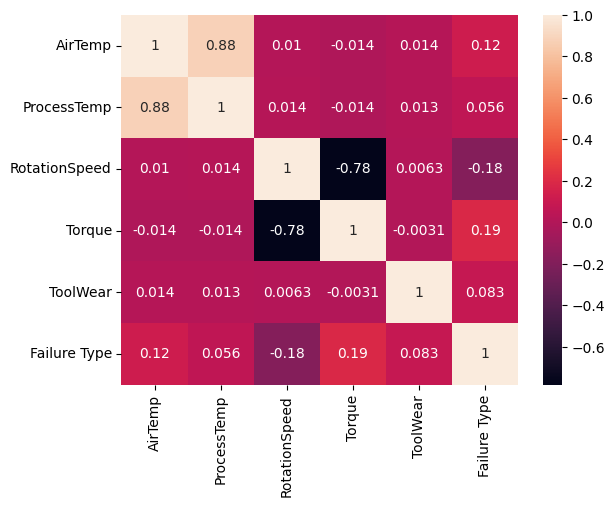

In [25]:
sns.heatmap(df.corr(method='pearson'),annot=True) # checking correlation among features

# Dividing Dataset

In [26]:
x = df.drop(columns = {'Failure Type'},axis=1) #input variables
y = df['Failure Type'] # target/output variables

# Splitting Into Train and Test

In [27]:
from sklearn.model_selection import train_test_split # library to split the dataset into train and test

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3,stratify=y) # split

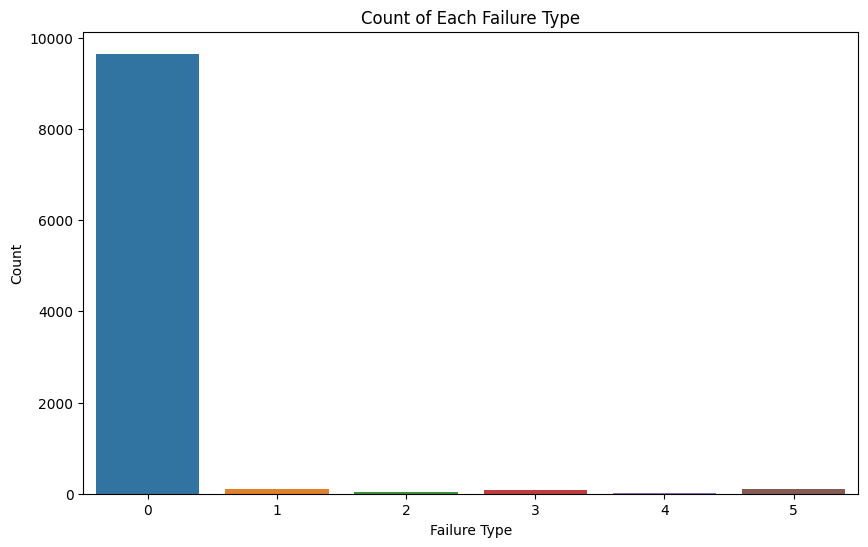

In [29]:
# Adjust figure size for better readability (optional)
plt.figure(figsize=(10, 6))

# Plot the counts of each Failure Type
sns.countplot(data=df, x='Failure Type')

# Add title and labels for clarity
plt.title('Count of Each Failure Type')
plt.xlabel('Failure Type')
plt.ylabel('Count')

plt.show()


Heavy Imbalance Among Different Failure Types Is Observed

# Feature Engineering

In [30]:
df['AirTemp'] = df['AirTemp']-273.15
df['ProcessTemp'] = df['ProcessTemp']-273.15
# converting above features into Celsius from Kelvin

In [31]:
from imblearn.over_sampling import SMOTE # since dataset is imbalanced , oversampling
sm = SMOTE(random_state=42)

In [32]:
x_trainre,y_trainre = sm.fit_resample(x_train,y_train) # oversampling the minority class here

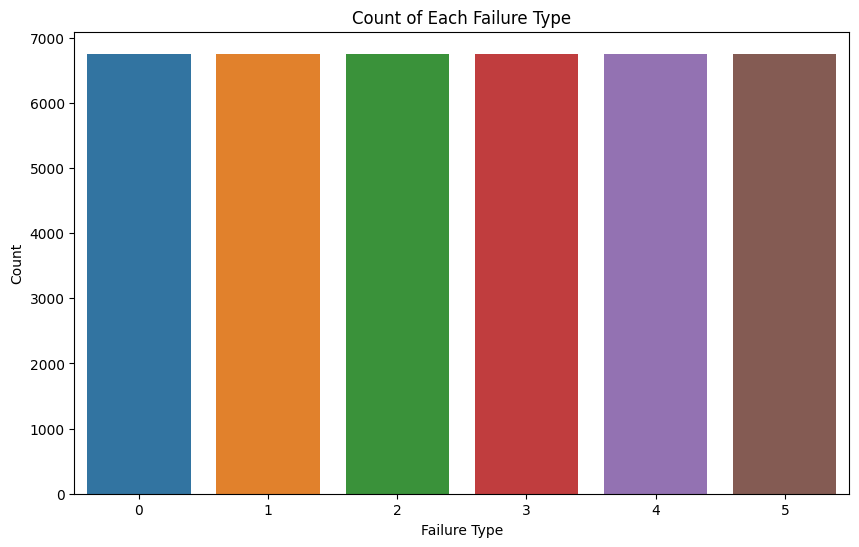

In [33]:
# Adjust figure size for better readability (optional)
plt.figure(figsize=(10, 6))

# Plot the counts of each Failure Type
sns.countplot(x=y_trainre)

# Add title and labels for clarity
plt.title('Count of Each Failure Type')
plt.xlabel('Failure Type')
plt.ylabel('Count')

plt.show()

The Imbalance is Now Addressed Successfully

In [34]:
x_trainre.skew() # checking the skew to determine appropriate scaler to scale the data

AirTemp         -0.241385
ProcessTemp     -0.246728
RotationSpeed    0.982539
Torque          -0.595513
ToolWear        -0.507604
dtype: float64

In [35]:
from sklearn.preprocessing import StandardScaler # data needs to be standardized so standard scaler

In [36]:
scale = StandardScaler()
x_trains = scale.fit_transform(x_trainre)
x_tests = scale.transform(x_test) # scaled the data here

In [37]:
x_trains

array([[ 0.98260658,  0.63824427,  2.35382375, -1.11437376,  0.96136586],
       [-0.86988699,  0.08603897,  0.41650307, -0.34528838, -0.69089342],
       [-1.63267846, -1.01837163,  0.44906308, -0.08218023, -1.15468549],
       ...,
       [ 1.03709168, -0.04630759, -1.00751686,  0.50701547, -0.83582844],
       [ 0.98260658,  0.11854785, -0.50524067,  0.3948475 ,  0.23669074],
       [ 1.49402252,  0.83859682, -1.02812583,  0.51849972, -1.45904904]])

# Trainning Models

### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42,max_depth=None,min_samples_split=2,min_samples_leaf=1,class_weight='balanced',splitter ='best',criterion='entropy')

In [39]:
dt.fit(x_trains,y_trainre)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

In [41]:
y_pred = dt.predict(x_tests)


In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2896
           1       0.37      0.64      0.47        28
           2       0.10      0.29      0.15        14
           3       0.45      0.65      0.54        23
           4       0.01      0.20      0.02         5
           5       0.79      0.97      0.87        34

    accuracy                           0.93      3000
   macro avg       0.45      0.62      0.50      3000
weighted avg       0.97      0.93      0.95      3000



In [43]:
print(confusion_matrix(y_test,y_pred))

[[2724   29   35   17   82    9]
 [  10   18    0    0    0    0]
 [   9    0    4    1    0    0]
 [   5    2    1   15    0    0]
 [   4    0    0    0    1    0]
 [   1    0    0    0    0   33]]


In [44]:
print(f'testing accuracy = {accuracy_score(y_test, y_pred) * 100}')
print(f'precision = {precision_score(y_test, y_pred, average="weighted") * 100}')
print(f'recall = {recall_score(y_test, y_pred, average="weighted") * 100}')
print(f'f1_score = {f1_score(y_test, y_pred, average="weighted") * 100}')


testing accuracy = 93.16666666666666
precision = 97.14694765722072
recall = 93.16666666666666
f1_score = 95.00274284305132


### Random-Forest-Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc = RandomForestClassifier(n_estimators=150,class_weight='balanced',criterion='entropy')

In [47]:
rfc.fit(x_trains,y_trainre)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=150)

In [48]:
yrf = rfc.predict(x_tests)

In [49]:
print(f'testing accuracy = {accuracy_score(y_test,yrf)*100}')
print(f'precision = {precision_score(y_test,yrf,average="weighted")*100}')
print(f'recall = {recall_score(y_test,yrf,average = "weighted")*100}')
print(f'f1_score = {f1_score(y_test,yrf,average="weighted")*100}')

testing accuracy = 95.33333333333334
precision = 97.42569528083612
recall = 95.33333333333334
f1_score = 96.30123629038415


In [50]:
confusion_matrix(y_test,yrf)

array([[2786,   10,   29,   19,   40,   12],
       [   5,   23,    0,    0,    0,    0],
       [  12,    0,    1,    1,    0,    0],
       [   3,    0,    0,   19,    0,    1],
       [   5,    0,    0,    0,    0,    0],
       [   2,    1,    0,    0,    0,   31]])

In [51]:
print(classification_report(y_test,yrf))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2896
           1       0.68      0.82      0.74        28
           2       0.03      0.07      0.05        14
           3       0.49      0.83      0.61        23
           4       0.00      0.00      0.00         5
           5       0.70      0.91      0.79        34

    accuracy                           0.95      3000
   macro avg       0.48      0.60      0.53      3000
weighted avg       0.97      0.95      0.96      3000



### XG-Boost

In [52]:
from xgboost import XGBClassifier

In [53]:
xgb = XGBClassifier(learning_rate=0.1,gamma=0.1,booster='gbtree',n_estimators=150)

In [54]:
xgb.fit(x_trains,y_trainre)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [55]:
yxgb = xgb.predict(x_tests)

In [56]:
print(f'testing accuracy = {accuracy_score(y_test,yxgb)*100}')
print(f'precision = {precision_score(y_test,yxgb,average="weighted")*100}')
print(f'recall = {recall_score(y_test,yxgb,average = "weighted")*100}')
print(f'f1_score = {f1_score(y_test,yxgb,average="weighted")*100}')

testing accuracy = 93.63333333333334
precision = 97.66332827703815
recall = 93.63333333333334
f1_score = 95.56275295481056


In [57]:
print(confusion_matrix(y_test,yxgb))

[[2734    9   50   15   84    4]
 [   4   24    0    0    0    0]
 [  12    0    1    1    0    0]
 [   4    0    0   18    0    1]
 [   5    0    0    0    0    0]
 [   2    0    0    0    0   32]]


# Model Evaluation

In [58]:
x_test[y_test==3].head()

,AirTemp,ProcessTemp,RotationSpeed,Torque,ToolWear
3356,301.6,310.8,1355.0,57.8,195
4117,301.9,310.5,1340.0,55.7,204
6255,301.0,310.5,1379.0,57.3,204
4814,303.4,311.8,1401.0,53.0,208
7509,300.6,311.9,1372.0,60.1,212


In [59]:
'''
'No Failure':0,
'Power Failure':1, 
'Tool Wear Failure':2,
'Overstrain Failure':3,
'Random Failures':4,
'Heat Dissipation Failure':5
'''

"\n'No Failure':0,\n'Power Failure':1, \n'Tool Wear Failure':2,\n'Overstrain Failure':3,\n'Random Failures':4,\n'Heat Dissipation Failure':5\n"

In [60]:
input = np.array([[300.6	,311.9	,1372.0	,60.1,	212
]]) # taking a row from the testing data
inputs = scale.transform(input) # transforming/standardizing

In [61]:
result = [dt.predict(inputs)[0],
rfc.predict(inputs)[0],
xgb.predict(inputs)[0]]
result # storing predictions in array

[1, 3, 3]

In [62]:
outputarr = ['No Failure',
'Power Failure', 
'Tool Wear Failure',
'Overstrain Failure',
'Random Failures',
'Heat Dissipation Failure'] # this is array section for different types of failures

In [63]:
final = pd.DataFrame({
    'Model' : ['Decision Tree','Random Forest','XG-Boost'],
    'Expected' : outputarr[y_test[7509]],
    'Actual' : [outputarr[result[0]],outputarr[result[1]],outputarr[result[2]]]
}) # dataframe

In [64]:
final.style.background_gradient(cmap='Blues')

,Model,Expected,Actual
0,Decision Tree,Overstrain Failure,Power Failure
1,Random Forest,Overstrain Failure,Overstrain Failure
2,XG-Boost,Overstrain Failure,Overstrain Failure


Conclusion :  Random Forest Is The Overall Best Performing Model on This Dataset